In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Podstawowa lista zaimportowanych bibliotek 


In [2]:
file_path = "C:\\Users\PC\PycharmProjects\Projekt Biostat\.venv\insurance.csv"

df = pd.read_csv(file_path)


Ścieżka do pliku a także odczyt pliku insurance.csv


In [3]:
bins = [0,18,35,44,59,100]
labels = ['0-18', '19-34', '35-44', '45-59', '60+']

bins1 = [0, 1, 2, 3, 4, float('inf')]  
labels1 = ['0', '1', '2', '3', '4+']  

Listy przedziałów dla grup wiekowych a także liczby dzieci użyte w późniejszych wykresach 

In [4]:
age = df['age']
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels)
age_group_count = df['age_group'].value_counts()

children = df['children']
df['children_group'] = pd.cut(df['children'], bins=bins1, labels=labels1, right=True)
children_group_counts = df['children_group'].value_counts()

bmi = df['bmi']
insurence = df['charges']

obliczenia niezbędne do wykresów 

In [5]:
mean_bmi = bmi.mean()
std_bmi = bmi.std()
skew_bmi = bmi.skew()
kurt_bmi = bmi.kurt()
min_bmi = bmi.min()
max_bmi = bmi.max()

mean_charges = insurence.mean()
std_charges =  insurence.std()
skew_charges = insurence.skew()
kurt_charges = insurence.kurt()
min_charges =  insurence.min()
max_charges =  insurence.max()

Obliczenia

In [6]:
print(f'the mean bmi is {mean_bmi}')
print(f'the std of bmi is {std_bmi}')
print(f'the skew of bmi is {skew_bmi}')
print(f'the kurt of bmi is {kurt_bmi}')
print(f'the min bmi is {min_bmi}')
print(f'the max bmi is {max_bmi}')
print('========================================')
print(f'the mean charges is {mean_charges}')
print(f'the std of charges is {std_charges}')
print(f'the skew charges is {skew_charges}')
print(f'the kurt charges is {kurt_charges}')
print(f'the min charges is {min_charges}')
print(f'the max charges is {max_charges}')

the mean bmi is 30.66339686098655
the std of bmi is 6.098186911679014
the skew of bmi is 0.2840471105987448
the kurt of bmi is -0.05073153135467834
the min bmi is 15.96
the max bmi is 53.13
the mean charges is 13270.422265141257
the std of charges is 12110.011236694001
the skew charges is 1.5158796580240388
the kurt charges is 1.6062986532967907
the min charges is 1121.8739
the max charges is 63770.42801


wyświetlanie wartości 

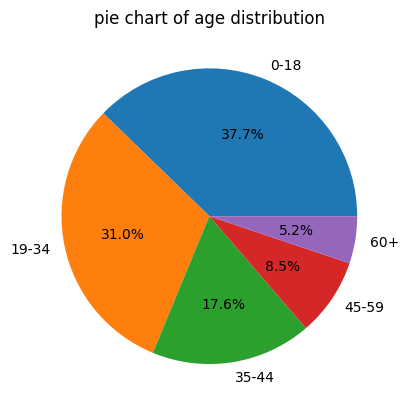

<Figure size 640x480 with 0 Axes>

In [7]:
plt.title(f"pie chart of age distribution",)
plt.pie(age_group_count, labels=labels, autopct='%1.1f%%')
plt.show()
plt.savefig("Wykrez rozkładu wieku")

wykres kołowy obrazujący rozkład grup wiekowych

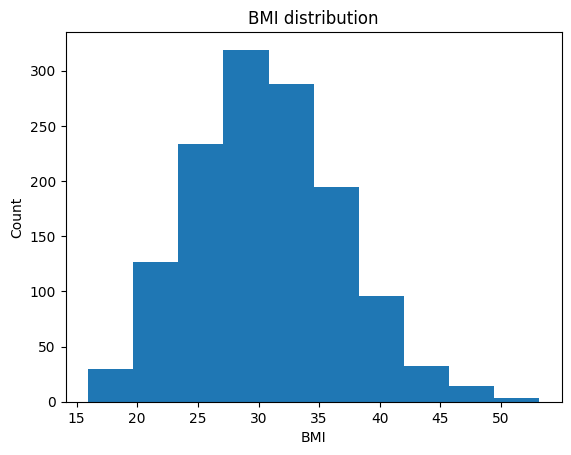

<Figure size 640x480 with 0 Axes>

In [8]:
plt.hist(bmi)
plt.title('BMI distribution')
plt.xlabel('BMI')
plt.ylabel('Count')
plt.show()
plt.savefig("rokzkład body mass index")

Histogram obrazujący rozkład stosunku masy do wzrostu body mass index 

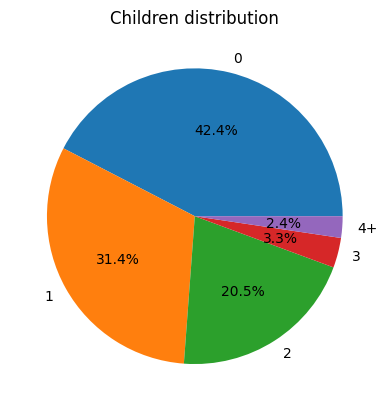

<Figure size 640x480 with 0 Axes>

In [9]:
plt.pie(children_group_counts,  labels=children_group_counts.index, autopct='%1.1f%%' )
plt.title('Children distribution')
plt.show()
plt.savefig("ilość dzieci w rodzinie")

wykres kołowy obrazujący ilość dzieci w rodzinie 

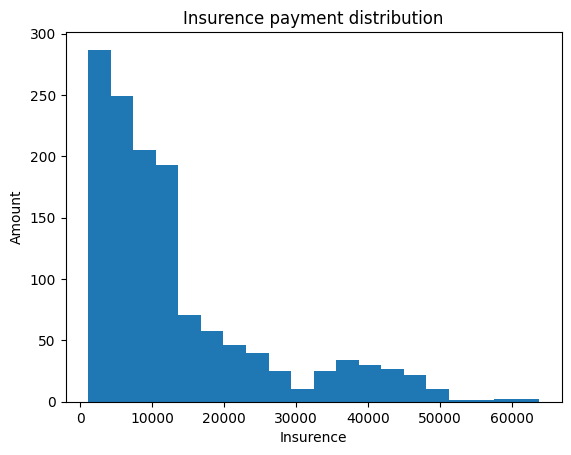

<Figure size 640x480 with 0 Axes>

In [10]:
plt.hist(insurence, bins = 20)
plt.title('Insurence payment distribution')
plt.xlabel('Insurence')
plt.ylabel('Amount')
plt.show()
plt.savefig("rozkład płatności za ubezpieczenie")

Histogram pokazujący rozkład płatności za ubezpieczenie 

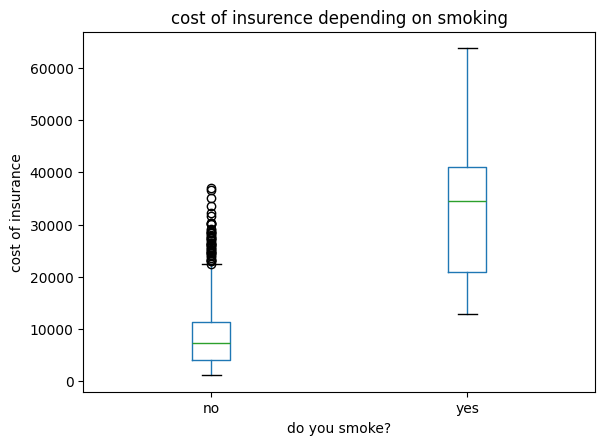

<Figure size 640x480 with 0 Axes>

In [11]:
df.boxplot(column='charges', by='smoker', grid=False)

# Dodanie tytułów i etykiet
plt.title('cost of insurence depending on smoking')
plt.suptitle('')
plt.xlabel('do you smoke?')
plt.ylabel('cost of insurance')
plt.show()
plt.savefig("wykes pudełkowy obrazujący zalezność palenia do kosztów ubezpieczenia")

wykes pudełkowy obrazujący zalezność palenia do kosztów ubezpieczenia

In [12]:
df['insurence_treashhold'] = df['charges'].apply(lambda x: '<20k' if x <20000 else '>20k')
cross_tab = pd.crosstab(df['insurence_treashhold'], df['smoker'], margins= True, margins_name = "sum")
print("cross table:")
print(cross_tab)

cross table:
smoker                  no  yes   sum
insurence_treashhold                 
<20k                  1003   62  1065
>20k                    61  212   273
sum                   1064  274  1338


tabela krzyżowa niezbędna do przeprowadzenia testu diagnostycznego który pomoże zrozumieć zależność między paleniem a kosztami ubezpieczenia 

In [13]:
column_mapping = {'no': 0, 'yes': 1}
cross_tab = cross_tab.rename(columns=column_mapping)

TP = cross_tab.loc['<20k', 1]
FN = cross_tab.loc['>20k', 1]
FP = cross_tab.loc['<20k', 0]
TN = cross_tab.loc['>20k', 0]

Mapowanie kolumn na wartości binarne (boolean) a także przypisane ich do  wartości TP, FN, FP, TN

In [14]:
sensivity = (TP / (TP + FN)) *100
specificity = (TN / (TN+FP)) *100
ppv = (TP / (TP + FP) )* 100
npv = (TN / (TN + FN)) *100
FA = abs((1 - specificity))
accuracy = ((TP + TN) / (TP + FN + FP + TN) )* 100

Obliczenia niezbędne do przeprowadzenia testów diagnostycznych : czułość, swoistość, wartość predykcyjna dodatnia, wartość predykcyjna ujemna, fałszywie pozytywne wyniki, dokładność


In [15]:
print(f'the amount of true positive cases is {TP}')
print(f'the amount of false negative cases is {FN}')
print(f'the amount of fale positive cases is {FP}')
print(f'the amount of true negative cases is {TN} ')
print("==============================================================")
print(f'The spensivity of diagnostics test is equeal to {sensivity}')
print(f'The specifity of diagnostics test is equeal to {specificity}')
print(f'The positive prognostics value is equeal to {ppv}')
print(f'The negative prognostics value is equeal to {npv}')
print(f'The falls alarm rate is equeal to {FA}')
print(f'The accuracy of diagnostics test is {accuracy}')


the amount of true positive cases is 62
the amount of false negative cases is 212
the amount of fale positive cases is 1003
the amount of true negative cases is 61 
The spensivity of diagnostics test is equeal to 22.62773722627737
The specifity of diagnostics test is equeal to 5.733082706766917
The positive prognostics value is equeal to 5.821596244131456
The negative prognostics value is equeal to 22.344322344322347
The falls alarm rate is equeal to 4.733082706766917
The accuracy of diagnostics test is 9.192825112107624


Wartości testów diagnostycznych z których wynika że palenie ma wpływ na koszty ubezpieczenia ale nie jest on jedynym czynnikiem wpływającym na koszty ubezpieczenia